In [2]:
import numpy as np
from scipy.linalg import null_space
import matplotlib.pyplot as plt

# Ch13 연습문제

[연습문제 13-1]
[연습문제 13-2]
[연습문제 13-7]


**[연습 문제 13-1]**

대칭 행렬의 경우 특잇값과 고윳값이 같다.

Python으로 무작위 5X5 [1]AᵀA 행렬을 사용하여 특이벡터와 고유벡터를 비교하라.

덧셈기법으로 [2]대칭 행렬(Aᵀ+A)을 만들어 다시 시도하여라.

(Aᵀ+A의 고윳값 부호 주의.)

In [4]:
n = 5
A = np.random.randn(n, n)  # 임의의 5x5 행렬
ATA = A.T @ A  # 대칭 행렬 A^T A
ATplusA = A.T + A  # 대칭 행렬 A^T + A

In [5]:
eigvals_ATA, eigvecs_ATA = np.linalg.eig(ATA)  # 고윳값 분해
U, s_ATA, Vt = np.linalg.svd(ATA)  # SVD

# A^T + A에 대한 특잇값 및 고윳값
eigvals_ATplusA, eigvecs_ATplusA = np.linalg.eig(ATplusA)
U_plusA, s_ATplusA, Vt_plusA = np.linalg.svd(ATplusA)

print("=== A^T A ===")
print("고윳값:", np.sort(eigvals_ATA))
print("특잇값:", np.sort(s_ATA))
print("\n=== A^T + A ===")
print("고윳값:", np.sort(eigvals_ATplusA))
print("특잇값:", np.sort(s_ATplusA))

=== A^T A ===
고윳값: [ 0.36859803  0.66132555  4.49785851 15.6114514  17.23382948]
특잇값: [ 0.36859803  0.66132555  4.49785851 15.6114514  17.23382948]

=== A^T + A ===
고윳값: [-6.21760729 -3.62567138 -2.52847028  0.67670325  3.11105361]
특잇값: [0.67670325 2.52847028 3.11105361 3.62567138 6.21760729]


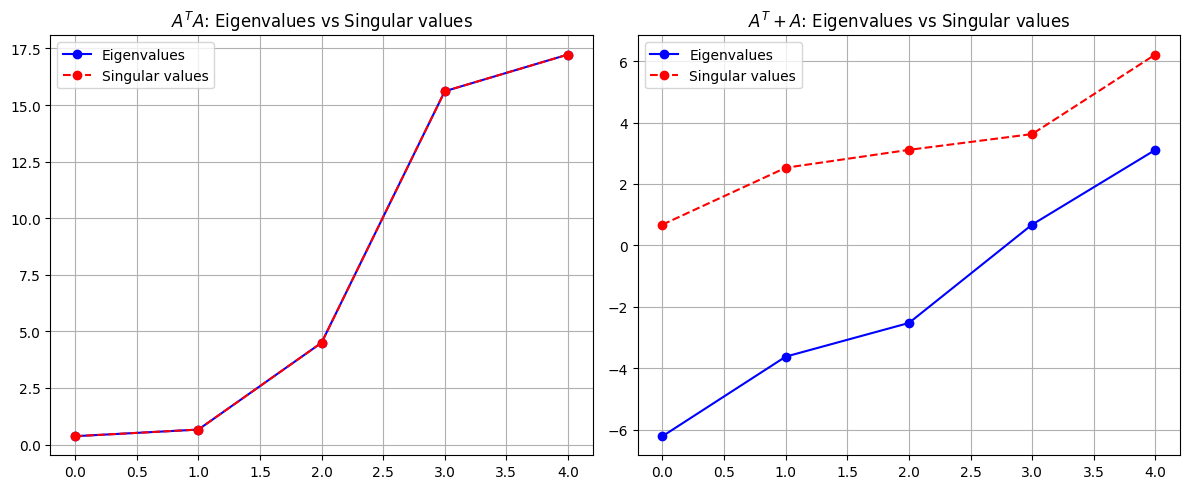

In [6]:
_, axs = plt.subplots(1, 2, figsize=(12, 5))

# A^T A
axs[0].plot(np.sort(eigvals_ATA), 'bo-', label='Eigenvalues')
axs[0].plot(np.sort(s_ATA), 'ro--', label='Singular values')
axs[0].set_title(r'$A^T A$: Eigenvalues vs Singular values')
axs[0].legend()
axs[0].grid()

# A^T + A
axs[1].plot(np.sort(eigvals_ATplusA), 'bo-', label='Eigenvalues')
axs[1].plot(np.sort(s_ATplusA), 'ro--', label='Singular values')
axs[1].set_title(r'$A^T + A$: Eigenvalues vs Singular values')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

[1]은 고윳값 = 특잇값

[2]고윳값은 부호를 가질 수 있지만, 특잇값은 절댓값으로만 나타남

**고유벡터와 특잇벡터**  
   - 고유벡터는 행렬의 방향성, 특잇벡터는 스케일링 정보
   - 대칭 행렬이 아닌 경우, 고유벡터와 특잇벡터가 다를 수 있습니다.

**[연습 문제 13-2]**

선택적으로 경제형 SVD를 반환할 수 있는데, 이는 특이벡터 행렬이 M 또는 N중에 작은 값에서 잘린다는 것을 의미함.

(행렬이 매우 크거나 컴퓨팅 자원이 매우 제한적인 경우 사용.)

높고 넓은 행렬로 확인하여라. 일반적으로 전체 행렬을 반환한다.

In [8]:
m, n = 10, 4  # 높고 넓은 행렬
A = np.random.randn(m, n)

U, s, Vt = np.linalg.svd(A, full_matrices=True)

print("U의 크기:", U.shape)
print("Vt의 크기:", Vt.shape)
print("특잇값 개수:", len(s))

U의 크기: (10, 10)
Vt의 크기: (4, 4)
특잇값 개수: 4


In [9]:
# 경제형 SVD 계산
U_econ, s_econ, Vt_econ = np.linalg.svd(A, full_matrices=False)

print("U_econ의 크기:", U_econ.shape)
print("Vt_econ의 크기:", Vt_econ.shape)
print("특잇값 개수:", len(s_econ))

U_econ의 크기: (10, 4)
Vt_econ의 크기: (4, 4)
특잇값 개수: 4


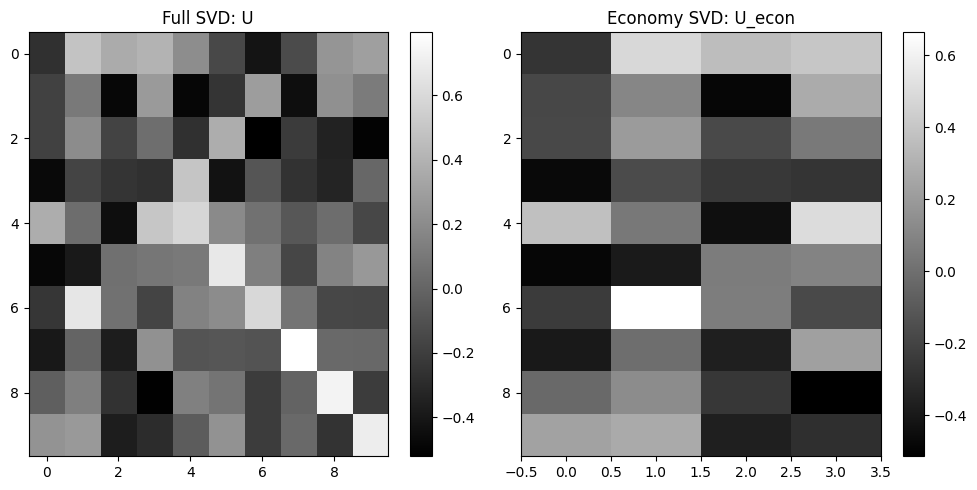

In [10]:
A_full = (U[:, :len(s)] @ np.diag(s) @ Vt)[:m, :n]  # 전체 SVD 복원
A_econ = U_econ @ np.diag(s_econ) @ Vt_econ  # 경제형 SVD 복원

# 7. 시각화: U와 U_econ 비교
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Full SVD: U")
plt.imshow(U, aspect='auto', cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Economy SVD: U_econ")
plt.imshow(U_econ, aspect='auto', cmap='gray')
plt.colorbar()

plt.tight_layout()
plt.show()

**Full SVD (`U`)**:
   - 크기: `(m, m)`로 전체 행렬을
   - 모든 특잇값에 대한 특이벡터를 포함하여, 크기가 더 큼
   - 주로 전체 정보를 유지해야 할 때 사용

**Economy SVD (`U_econ`)**:
   - 크기: `(m, min(m, n))`로 작은 값에 잘려져 있습니다.
   - 불필요한 0 또는 작은 부분을 제거하여 메모리 절약이 가능하며, 계산 효율성을 높임
   - 크기를 확인하면 `U_econ`이 더 작게 출력

**[연습 문제 13-7]**

높은 최대계수 행렬 $(A^TA)^{-1}A^T$의 명시적 왼쪽 역행렬과 A의 의사역행렬을 계산해라.

MP 의사역행렬이 최대열계수 행렬의 왼쪽 역행렬과 같음을 증명하여라.

넓은 최대 계수 행렬의 오른쪽 역에 대해서도 증명하여라.








In [11]:
# 명시적 왼쪽 역행렬
left_inv = np.linalg.inv(A.T @ A) @ A.T

# Moore-Penrose 의사역행렬
mp_pinv = np.linalg.pinv(A)

print("왼쪽 역행렬과 MP 의사역행렬 비교:")
print("차이:\n", np.round(left_inv - mp_pinv, 10))
print("왼쪽 역행렬과 MP 의사역행렬이 같은가?:", np.allclose(left_inv, mp_pinv))

왼쪽 역행렬과 MP 의사역행렬 비교:
차이:
 [[-0. -0. -0. -0. -0. -0. -0. -0.  0.  0.]
 [-0.  0.  0.  0. -0.  0.  0.  0.  0. -0.]
 [ 0. -0.  0. -0. -0.  0. -0. -0. -0. -0.]
 [ 0.  0.  0. -0.  0. -0.  0.  0. -0. -0.]]
왼쪽 역행렬과 MP 의사역행렬이 같은가?: True


In [15]:
# 특잇값 분해(SVD)
U, s, Vt = np.linalg.svd(A)

# S_inv를 A의 크기에 맞게 생성 (n x m 크기)
S_inv = np.zeros((Vt.shape[0], U.shape[0]))  # (n x m)
np.fill_diagonal(S_inv, 1 / s)

# SVD를 활용한 오른쪽 역행렬 계산
right_inv_svd = Vt.T @ S_inv @ U.T

# Moore-Penrose 의사역행렬 계산
mp_pinv = np.linalg.pinv(A)

# 결과 비교
print("\nSVD 기반 오른쪽 역행렬과 MP 의사역행렬 비교:")
print("차이:\n", np.round(right_inv_svd - mp_pinv, 10))
print("SVD 기반 오른쪽 역행렬과 MP 의사역행렬이 같은가?:", np.allclose(right_inv_svd, mp_pinv))


SVD 기반 오른쪽 역행렬과 MP 의사역행렬 비교:
차이:
 [[ 0.  0. -0.  0. -0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -0. -0.]
 [ 0. -0. -0. -0.  0.  0.  0. -0.  0.  0.]]
SVD 기반 오른쪽 역행렬과 MP 의사역행렬이 같은가?: True


---

### **Moore-Penrose 의사역행렬의 정의와 $ (A^T A)^{-1} A^T $(왼쪽역행렬)과의 동치성 증명**
**$ A^\dagger $ (Moore-Penrose 의사역행렬)는 다음 네 가지 성질을 만족함.**
1. $ A A^\dagger A = A $
  
   > $A \cdot (A^T A)^{-1} A^T \cdot A = A$
   - $ (A^T A)^{-1} $는 $ A^T A $의 역행렬이므로 $ A^T A \cdot (A^T A)^{-1} = I $.
   - 따라서 $ A A^\dagger A = A $ 성립.

2. $ A^\dagger A A^\dagger = A^\dagger $

   >$(A^T A)^{-1} A^T \cdot A \cdot (A^T A)^{-1} A^T = (A^T A)^{-1} A^T$
   - $ A^T A \cdot (A^T A)^{-1} = I $로 인해 $ A^\dagger A A^\dagger = A^\dagger $ 성립.

3. $ (A A^\dagger)^T = A A^\dagger $

   >$(A \cdot (A^T A)^{-1} A^T)^T = A \cdot (A^T A)^{-1} A^T$
   - 행렬 곱의 전치 성질 $ (AB)^T = B^T A^T $를 이용하여 성립.

4. $ (A^\dagger A)^T = A^\dagger A $

   >$((A^T A)^{-1} A^T \cdot A)^T = (A^T A)^{-1} A^T \cdot A$
   - 동일한 방법으로 성립.

**∴ $ A^\dagger = (A^T A)^{-1} A^T $가 성립하며, 이는 MP 의사역행렬 정의를 만족함.**

> *($ A^T (A A^T)^{-1} $(오른쪽 역행렬) 역시 같은 방식으로 증명 가능)*